# Prepare Dataset

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download super-ai-engineer-2021-properties-tagging
! kaggle competitions download super-ai-engineer-2021-house-grade-classification

100% 4.04G/4.05G [00:19<00:00, 232MB/s]
100% 4.05G/4.05G [00:19<00:00, 225MB/s]
100% 2.31G/2.31G [00:09<00:00, 305MB/s]
100% 2.31G/2.31G [00:09<00:00, 255MB/s]


In [ ]:
!unzip /content/super-ai-engineer-2021-properties-tagging.zip -d /content/task2
!unzip /content/super-ai-engineer-2021-house-grade-classification.zip -d /content/task1

Streaming output truncated to the last 5000 lines.
  inflating: /content/task2/extra/img_13-8067058_100-5804031_a90-96423767_s0-9642376699999886_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067473_100-5777149_a1-80176007_s91-80176007_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067639_100-5656579_a327-7831492_s237-78314920000003_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067639_100-5656579_a327-7831492_s57-783149200000025_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067644_100-5893024_a87-77464259_s177-77464258999998_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067644_100-5893024_a87-77464259_s357-77464259_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8067875_100-587404_a99-63830441_s9-63830440999999_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8068085_100-5951222_a167-5624936_s257-56249360000004_y0_f90_1.jpg  
  inflating: /content/task2/extra/img_13-8068085_100-5951222_a167-5624936_s77-56249360000004_y

In [ ]:
!mv "/content/task1/train" "/content/task2"
!mv "/content/task1/test" "/content/task2"

In [ ]:
!rm -r "/content/task1"

# Analyze data

# Preprocess Data

In [ ]:
labels = {0: 'None', 1 : 'Camera', 2 : 'Parking', 3 : 'Car', 4: 'Shrine', 5 : 'Backyard'}

In [ ]:
import pandas as pd
train_df = pd.read_csv('/content/task2/train.csv')
train_df

In [ ]:
extra_df = pd.read_csv('/content/task2/extra.csv')
extra_df

In [ ]:
one_hot = train_df['labels'].str.get_dummies(sep=' ')
train_df = pd.concat([train_df, one_hot], axis=1)
train_df

In [ ]:
one_hot = extra_df['labels'].str.get_dummies(sep=' ')
extra_df = pd.concat([extra_df, one_hot], axis=1)
extra_df

In [ ]:
train_df['path'] = '/content/task2/train/' + train_df['filename']
extra_df['path'] = '/content/task2/extra/' + extra_df['filename']
extra_df

In [ ]:
train_df = pd.concat([train_df, extra_df], ignore_index=True)

In [ ]:
garden = list(train_df[train_df.labels.str.split(' ').str[-1] == '5']['path'])

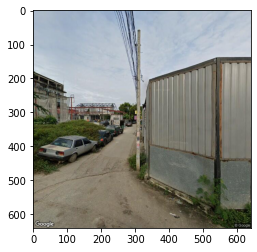

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(train_df.loc[14,'path'])
plt.imshow(image)

In [ ]:
train_df.groupby('labels').count()

,filename,path
labels,,
0,4768,4768
1,40,40
1 2,2,2
1 2 3,8,8
1 2 3 4,1,1
1 3,8,8
1 5,3,3
2,358,358
2 3,889,889


In [ ]:
train_df.groupby('0').count(), train_df.groupby('1').count(), train_df.groupby('2').count(), train_df.groupby('3').count(), train_df.groupby('4').count(), train_df.groupby('5').count()

(   filename  labels  path     1     2     3     4     5
 0                                                      
 0      2095    6205  6205  6205  6205  6205  6205  6205
 1      1600    1600  1600  1600  1600  1600  1600  1600,
    filename  labels  path     0     2     3     4     5
 1                                                      
 0      3633    6293  6293  6293  6293  6293  6293  6293
 1        62    1512  1512  1512  1512  1512  1512  1512,
    filename  labels  path     0     1     3     4     5
 2                                                      
 0      2317    6201  6201  6201  6201  6201  6201  6201
 1      1378    1604  1604  1604  1604  1604  1604  1604,
    filename  labels  path     0     1     2     4     5
 3                                                      
 0      2377    6231  6231  6231  6231  6231  6231  6231
 1      1318    1574  1574  1574  1574  1574  1574  1574,
    filename  labels  path     0     1     2     3     5
 4                         

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns

df = train_df.copy()
# Get label frequencies in descending order
class_0 = len(df[df['0'] == 1])
class_1 = len(df[df['1'] == 1])
class_2 = len(df[df['2'] == 1])
class_3 = len(df[df['3'] == 1])
class_4 = len(df[df['4'] == 1])
class_5 = len(df[df['5'] == 1])
label_freq = [class_0, class_1, class_2, class_3, class_4, class_5]

# Bar plot
style.use("fivethirtyeight")
plt.figure(figsize=(10,8))
sns.barplot(y=label_freq, x=[0,1,2,3,4,5], order=[0,3,2,5,4,1])
plt.title("Label frequency", fontsize=18)
plt.xlabel("")
plt.xticks(fontsize=20)
plt.yticks(fontsize=12)
plt.show()

# Upsampling

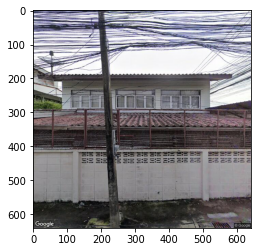

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

image = Image.open(train_df.loc[0,'path'])
plt.imshow(image)

In [ ]:
import albumentations as A
import cv2

In [ ]:
from cv2 import imread
def load_image(file_path):
    #file_path = image_id
    image = imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [ ]:
albumentationAug = A.Compose([A.RandomContrast(p=.6, limit=(.1,.7)),
                              A.RandomBrightness(p=.6, limit=(.2, .6)),
                              A.HorizontalFlip(p=.5),
                              A.Blur(blur_limit=(1,6), p=.6,
                                     #rotate, crop, noise, shift, zoomin, zoomout, elastic(หยักๆคลื่น), jigsaw)
])

In [ ]:
label_1 = list(train_df[train_df['labels'] == '1'].path)

In [ ]:
label_1[0].split('.jpg')[0]

'/content/task2/train/ChokChai4_img_13-8004108_100-5870294_a93-94671915474494_s270_y0_f90_1'

In [ ]:
paths = []
labels_aug = []
for f in label_1:
  image = load_image(f)

  for i in range(0, 30):
    transformed = albumentationAug(image = image)['image']
    im = Image.fromarray(transformed)
    path = f.split('.jpg')[0] + '_' + str(i) + '.jpg'
    im.save(path)
    paths.append(path)
    labels_aug.append('1')

In [ ]:
label_1 = list(train_df[train_df['labels'] == '1 5'].path)
for f in label_1:
  image = load_image(f)

  for i in range(0, 20):
    transformed = albumentationAug(image = image)['image']
    im = Image.fromarray(transformed)
    path = f.split('.jpg')[0] + '_' + str(i) + '.jpg'
    im.save(path)
    paths.append(path)
    labels_aug.append('1 5')

In [ ]:
len(labels_aug), len(paths)

(1450, 1450)

In [ ]:
data = {'path' : paths, 'labels' : labels_aug}
d1 = pd.DataFrame(data)
d1.to_csv('./augment_class1.csv', index = False)
d1

,path,labels
0,/content/task2/train/ChokChai4_img_13-8004108_...,1
1,/content/task2/train/ChokChai4_img_13-8004108_...,1
2,/content/task2/train/ChokChai4_img_13-8004108_...,1
3,/content/task2/train/ChokChai4_img_13-8004108_...,1
4,/content/task2/train/ChokChai4_img_13-8004108_...,1
...,...,...
1445,/content/task2/extra/img_13-8275282_100-575776...,1 5
1446,/content/task2/extra/img_13-8275282_100-575776...,1 5
1447,/content/task2/extra/img_13-8275282_100-575776...,1 5
1448,/content/task2/extra/img_13-8275282_100-575776...,1 5


In [ ]:
d1.groupby('labels').count()

,path
labels,
5,1224


In [ ]:
df_1 = pd.read_csv('/content/augment_class1.csv')
df_4 = pd.read_csv('/content/augment_class4.csv')
df_5 = pd.read_csv('/content/augment_class5.csv')

In [ ]:
merged = pd.concat([train_df, df_1, df_4, df_5], ignore_index = True)
#merged.drop(columns = ['0', '1', '2', '3', '4', '5'], inplace=True)
merged

,filename,labels,path
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7955799_...
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,/content/task2/train/ChokChai4_img_13-7961753_...
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,/content/task2/train/ChokChai4_img_13-7969811_...
...,...,...,...
12946,NaN,5,/content/task2/extra/img_13-7617852_100-539522...
12947,NaN,5,/content/task2/extra/img_13-7617852_100-539522...
12948,NaN,5,/content/task2/extra/img_13-7617852_100-539522...
12949,NaN,5,/content/task2/extra/img_13-7617852_100-539522...


In [ ]:
one_hot = merged['labels'].str.get_dummies(sep=' ')
merged = pd.concat([merged, one_hot], axis = 1)
merged


,filename,labels,path,0,1,2,3,4,5
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7955799_...,1,0,0,0,0,0
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,/content/task2/train/ChokChai4_img_13-7961753_...,1,0,0,0,0,0
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,/content/task2/train/ChokChai4_img_13-7969811_...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12946,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12947,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12948,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12949,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1


In [ ]:
merged.to_csv('upsampling.csv', index = False)

In [ ]:
!zip -r '/content/drive/MyDrive/FaiFolder/upsampling.zip' '/content/task2'

Streaming output truncated to the last 5000 lines.
  adding: content/task2/extra/img_13-7790406_100-5852796_a280-2335281_s10-233528100000001_y0_f90_1_1.jpg (deflated 4%)
  adding: content/task2/extra/img_13-7723667_100-6028748_a128-7296783_s38-72967829999999_y0_f90_1.jpg (deflated 1%)
  adding: content/task2/extra/ChokChai4_img_13-8048876_100-6012848_a265-4182013170721_s90_y0_f90_1.jpg (deflated 0%)
  adding: content/task2/extra/img_13-8043828_100-5956622_a183-4147689_s93-41476890000001_y0_f90_1_18.jpg (deflated 2%)
  adding: content/task2/extra/img_13-7729496_100-5926626_a93-62925532_s183-62925532_y0_f90_1.jpg (deflated 1%)
  adding: content/task2/extra/img_13-7582817_100-5294715_a191-3349495_s101-3349495_y0_f90_1.jpg (deflated 1%)
  adding: content/task2/extra/img_13-7570015_100-5295233_a283-956344_s193-95634399999994_y0_f90_1_0.jpg (deflated 2%)
  adding: content/task2/extra/img_13-8261388_100-5813995_a0-267531763_s90-267531763_y0_f90_1.jpg (deflated 0%)
  adding: content/task2/extr

In [ ]:
import os
k =os.path.join('./Task2')
k

'./Task2/train'

In [ ]:
train_df = merged.copy()
train_df

,filename,labels,path,0,1,2,3,4,5
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7955799_...,1,0,0,0,0,0
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,/content/task2/train/ChokChai4_img_13-7961753_...,1,0,0,0,0,0
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,/content/task2/train/ChokChai4_img_13-7969811_...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12946,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12947,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12948,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12949,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1


In [ ]:
indexes = train_df[train_df['labels'] == '0'].index 
# k = train_df[train_df['labels'] == '0']
train_df = train_df.drop(indexes[1600:])
train_df

,filename,labels,path,0,1,2,3,4,5
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7955799_...,1,0,0,0,0,0
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,/content/task2/train/ChokChai4_img_13-7961753_...,1,0,0,0,0,0
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,/content/task2/train/ChokChai4_img_13-7969811_...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12946,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12947,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12948,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12949,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1


In [ ]:
indexes = train_df[train_df['labels'] == '3'].index 
# k = train_df[train_df['labels'] == '0']
train_df = train_df.drop(indexes[270:])
train_df

,filename,labels,path,0,1,2,3,4,5
0,ChokChai4_img_13-7955799_100-6031141_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7955799_...,1,0,0,0,0,0
1,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
2,ChokChai4_img_13-7956791_100-6031267_a187-2159...,0,/content/task2/train/ChokChai4_img_13-7956791_...,1,0,0,0,0,0
3,ChokChai4_img_13-7961753_100-6031881_a185-9785...,0,/content/task2/train/ChokChai4_img_13-7961753_...,1,0,0,0,0,0
4,ChokChai4_img_13-7969811_100-5906061_a180-5812...,0,/content/task2/train/ChokChai4_img_13-7969811_...,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
12946,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12947,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12948,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1
12949,NaN,5,/content/task2/extra/img_13-7617852_100-539522...,0,0,0,0,0,1


In [ ]:
train_df = train_df.reset_index(drop=True)

In [ ]:
train_df.to_csv('/content/drive/MyDrive/FaiFolder/balanced_data.csv', index = False)

# Resize Image

In [ ]:
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing import image

train_image = []

for i in tqdm(range(train_df.shape[0])):
    img = image.load_img(train_df.loc[i, 'path'], target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255.
    train_image.append(img)

X = np.array(train_image)

100%|██████████| 7805/7805 [01:49<00:00, 71.55it/s] 


In [ ]:
y = np.array(train_df.drop(['filename', 'path', 'labels'],axis=1))

In [ ]:
X.shape, y.shape

((7805, 224, 224, 3), (7805, 6))

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=999, test_size=0.15, shuffle=True)

# Model

In [ ]:
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# from tensorflow.keras.applications import VGG16

In [ ]:
# train_datagen = ImageDataGenerator()
# train_datagen.fit(X_train)

# train_generator = train_datagen.flow(X_train, y_train, batch_size = 32)

In [ ]:
from tensorflow.keras import Sequential
from tensorflow.keras.applications import VGG16

from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout

In [ ]:
activation = 'sigmoid'
pretrained = VGG16(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))

for layer in pretrained.layers:
    layer.trainable = False

model = Sequential()
model.add(pretrained)
model.add(GlobalAveragePooling2D())
model.add(Dense(512, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(6, activation=activation))

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow import keras
opt = keras.optimizers.Adam(learning_rate=0.0001)

checkpoint_filepath = '/content/drive/MyDrive/FaiFolder/VGG16_chekpoint/'
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_accuracy',
    mode='max',
    save_best_only=True)


model.compile(optimizer = opt, loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=300, verbose=1, batch_size=16, callbacks=[model_checkpoint_callback])

Epoch 1/300
415/415 [==============================] - 42s 67ms/step - loss: 0.5088 - accuracy: 0.2344 - val_loss: 0.4753 - val_accuracy: 0.3732
Epoch 2/300
415/415 [==============================] - 26s 63ms/step - loss: 0.4728 - accuracy: 0.3273 - val_loss: 0.4487 - val_accuracy: 0.4039
Epoch 3/300
415/415 [==============================] - 25s 59ms/step - loss: 0.4518 - accuracy: 0.3830 - val_loss: 0.4305 - val_accuracy: 0.4372
Epoch 4/300
415/415 [==============================] - 25s 59ms/step - loss: 0.4330 - accuracy: 0.4160 - val_loss: 0.4143 - val_accuracy: 0.4799
Epoch 5/300
415/415 [==============================] - 21s 50ms/step - loss: 0.4183 - accuracy: 0.4515 - val_loss: 0.4018 - val_accuracy: 0.4791
Epoch 6/300
415/415 [==============================] - 24s 59ms/step - loss: 0.4046 - accuracy: 0.4732 - val_loss: 0.3927 - val_accuracy: 0.5013
Epoch 7/300
415/415 [==============================] - 24s 59ms/step - loss: 0.3940 - accuracy: 0.4922 - val_loss: 0.3816 - val_ac

In [ ]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=25, callbacks=[model_checkpoint_callback])

Epoch 1/100
415/415 [==============================] - 56s 104ms/step - loss: 0.5165 - accuracy: 0.2223 - val_loss: 0.4804 - val_accuracy: 0.3322
Epoch 2/100
415/415 [==============================] - 42s 101ms/step - loss: 0.4796 - accuracy: 0.3156 - val_loss: 0.4535 - val_accuracy: 0.4159
Epoch 3/100
415/415 [==============================] - 42s 102ms/step - loss: 0.4583 - accuracy: 0.3604 - val_loss: 0.4366 - val_accuracy: 0.4398
Epoch 4/100
415/415 [==============================] - 45s 109ms/step - loss: 0.4427 - accuracy: 0.4031 - val_loss: 0.4216 - val_accuracy: 0.4432
Epoch 5/100
415/415 [==============================] - 45s 108ms/step - loss: 0.4263 - accuracy: 0.4299 - val_loss: 0.4095 - val_accuracy: 0.4611
Epoch 6/100
415/415 [==============================] - 46s 110ms/step - loss: 0.4145 - accuracy: 0.4543 - val_loss: 0.3998 - val_accuracy: 0.4757
Epoch 7/100
415/415 [==============================] - 45s 108ms/step - loss: 0.4067 - accuracy: 0.4664 - val_loss: 0.3907 -

In [ ]:
!zip -r ./after_upsampling_vgg16.zip /content/vgg16_model

updating: content/vgg16_model/ (stored 0%)
  adding: content/vgg16_model/variables/ (stored 0%)
  adding: content/vgg16_model/variables/variables.index (deflated 66%)
  adding: content/vgg16_model/variables/variables.data-00000-of-00001 (deflated 9%)
  adding: content/vgg16_model/saved_model.pb (deflated 90%)
  adding: content/vgg16_model/assets/ (stored 0%)
  adding: content/vgg16_model/keras_metadata.pb (deflated 96%)


# Test Model

In [ ]:
import tensorflow as tf
loaded_model = tf.keras.models.load_model("/content/drive/MyDrive/FaiFolder/VGG16_chekpoint")

In [ ]:
import glob
test = glob.glob('/content/task2/test/*')
test

['/content/task2/test/7a45401e.jpg',
 '/content/task2/test/5c59c118.jpg',
 '/content/task2/test/b965e3aa.jpg',
 '/content/task2/test/b0c149d4.jpg',
 '/content/task2/test/9b764ff5.jpg',
 '/content/task2/test/9459a905.jpg',
 '/content/task2/test/ed3719a5.jpg',
 '/content/task2/test/2c6adef4.jpg',
 '/content/task2/test/5923d103.jpg',
 '/content/task2/test/5e8aea48.jpg',
 '/content/task2/test/a31ca645.jpg',
 '/content/task2/test/d54e3433.jpg',
 '/content/task2/test/b90c1985.jpg',
 '/content/task2/test/35d7632c.jpg',
 '/content/task2/test/65a07b78.jpg',
 '/content/task2/test/8df7aec6.jpg',
 '/content/task2/test/254f3c01.jpg',
 '/content/task2/test/53626eb3.jpg',
 '/content/task2/test/f0949a41.jpg',
 '/content/task2/test/e69c40e0.jpg',
 '/content/task2/test/e6246fb6.jpg',
 '/content/task2/test/1aaa133c.jpg',
 '/content/task2/test/3596294e.jpg',
 '/content/task2/test/8e379a63.jpg',
 '/content/task2/test/f89230f6.jpg',
 '/content/task2/test/91ea5755.jpg',
 '/content/task2/test/aa9d5db0.jpg',
 

In [ ]:
from tqdm import tqdm
import numpy as np
from tensorflow.keras.preprocessing import image

test_image = []

for i in tqdm(range(0, len(test))):
    img = image.load_img(test[i], target_size=(224,224,3))
    img = image.img_to_array(img)
    img = img/255.
    test_image.append(img)

test_img = np.array(test_image)

100%|██████████| 450/450 [00:04<00:00, 100.75it/s]


In [ ]:
results = loaded_model.predict(test_img)

In [ ]:
results

array([[9.8279679e-01, 7.6743305e-09, 2.6928962e-04, 1.4644830e-03,
        3.8682570e-06, 1.8361857e-02],
       [7.5831705e-01, 5.5768392e-06, 5.3960939e-05, 4.1884250e-05,
        5.3479988e-04, 2.2752136e-03],
       [3.4856474e-01, 1.9607700e-04, 7.3069322e-01, 2.3661138e-01,
        5.5350149e-03, 3.4057056e-03],
       ...,
       [6.9461450e-02, 2.6349849e-01, 8.9292949e-01, 5.3465265e-01,
        4.6985803e-04, 3.6846341e-05],
       [9.9412823e-01, 9.7073257e-07, 4.2182952e-04, 1.0912181e-03,
        2.2370668e-04, 1.6520009e-03],
       [1.7263870e-01, 1.7032766e-04, 5.2273188e-02, 5.7977173e-02,
        7.5132608e-01, 2.9946973e-03]], dtype=float32)

In [ ]:
results[203]

array([9.8527558e-02, 5.9040479e-04, 9.4548237e-01, 6.1770880e-01,
       1.1727336e-03, 3.4313845e-05], dtype=float32)

In [ ]:
# labels = {0: 'None', 1 : 'Camera', 2 : 'Parking', 3 : 'Car', 4: 'Shrine', 5 : 'Backyard'}

In [ ]:
m = [[1 if k >.5 and k>=results[i][0] else 0 for k in results[i]] for i in range (0, len(results))]
m

[[1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 1, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 1],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 0, 0, 1, 0],
 [1, 0, 0, 0, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0],
 [1, 0, 0, 1, 0, 0],
 [0, 0, 1, 1, 0, 0],
 [1, 0, 0, 0,

In [ ]:
len(m)

450

In [ ]:
o = [[index if k == 1 else "" for index, k in enumerate(m[i])] for i in range (0, len(m))]
o

[[0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, '', '', ''],
 ['', '', '', 3, '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, 3, '', ''],
 ['', 1, 2, 3, '', ''],
 ['', '', '', '', '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', '', '', '', ''],
 ['', '', '', '', '', 5],
 [0, '', '', '', '', ''],
 ['', '', 2, '', '', ''],
 ['', '', 2, '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, '', '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', '', '', 4, ''],
 ['', '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, 3, '', ''],
 ['', '', '', 3, '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', '', 3, '', ''],
 ['', '', '', 3, '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, '', '', ''],
 [0, '', '', '', '', ''],
 [0, '', '', '', '', ''],
 ['', '', '', '', '', ''],
 ['', '', 2, 3, '', ''],
 [0, '', '', '', '', ''],
 ['', '', 2, '', '', ''],
 [0, '', '', 

In [ ]:
final = []
for index, element in enumerate(o):
  txt = []
  check = True
  for subi, sube in enumerate(o[index]):
     if sube != "" :
       txt.append(str(sube))
       check = False
  if check:
    txt.append(str(0))
  final.append(" ".join(txt))
final

['0',
 '0',
 '2',
 '3',
 '0',
 '2 3',
 '1 2 3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '5',
 '0',
 '2',
 '2',
 '0',
 '2',
 '0',
 '0',
 '4',
 '0',
 '0',
 '2 3',
 '3',
 '0',
 '0',
 '3',
 '3',
 '0',
 '2',
 '0',
 '0',
 '0',
 '2 3',
 '0',
 '2',
 '0',
 '4',
 '0',
 '2 3',
 '0',
 '0',
 '0',
 '0 3',
 '2 3',
 '0',
 '0',
 '2',
 '0',
 '4',
 '2 3',
 '0',
 '0',
 '3',
 '0',
 '0',
 '0',
 '2 3',
 '2 3 4',
 '0',
 '2 3',
 '2 3',
 '3',
 '2 3',
 '2 3',
 '2 3',
 '3',
 '0',
 '0',
 '2 3',
 '0',
 '1',
 '0',
 '0',
 '0',
 '2',
 '3',
 '0',
 '0',
 '2 3',
 '2 3',
 '2 3',
 '2',
 '0',
 '2 3',
 '2 3',
 '0',
 '2 3',
 '0',
 '4',
 '0',
 '0',
 '0 2',
 '5',
 '0',
 '0',
 '2 3',
 '0',
 '2 3',
 '3',
 '2',
 '2 3',
 '5',
 '3',
 '0',
 '0',
 '4 5',
 '0',
 '0',
 '0',
 '0',
 '0',
 '4',
 '1',
 '3 4',
 '2',
 '2',
 '2',
 '0',
 '2 3',
 '0 3',
 '2 3',
 '2',
 '0',
 '0',
 '3',
 '0',
 '0',
 '2',
 '2 3',
 '5',
 '0',
 '2 3',
 '2 3',
 '0',
 '2 3',
 '0',
 '2',
 '2',
 '0',
 '2',
 '0',
 '0',
 '0',
 '2',
 '3',
 '0',
 '5',
 '2 3',
 '2',
 '3',
 '0',


In [ ]:
prediction = pd.DataFrame({'Id': test, 'Predicted' : final})
prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         450 non-null    object
 1   Predicted  450 non-null    object
dtypes: object(2)
memory usage: 7.2+ KB


In [ ]:
prediction

,Id,Predicted
0,/content/task2/test/7a45401e.jpg,0
1,/content/task2/test/5c59c118.jpg,0
2,/content/task2/test/b965e3aa.jpg,2
3,/content/task2/test/b0c149d4.jpg,3
4,/content/task2/test/9b764ff5.jpg,0
...,...,...
445,/content/task2/test/23d267ad.jpg,0
446,/content/task2/test/e1122f3e.jpg,2
447,/content/task2/test/be593352.jpg,2 3
448,/content/task2/test/1b691cea.jpg,0


In [ ]:
prediction['Id'] = prediction['Id'].str.split('/').str[-1].str.split('.jpg').str[0]

In [ ]:
prediction

,Id,Predicted
0,7a45401e,0
1,5c59c118,0
2,b965e3aa,2
3,b0c149d4,3
4,9b764ff5,0
...,...,...
445,23d267ad,0
446,e1122f3e,2
447,be593352,2 3
448,1b691cea,0


In [ ]:
sample = pd.read_csv('/content/task2/sample_submission.csv')
sample

,Id,Labels
0,d5461e01,2 3
1,0e6bd6ea,0
2,03df66ca,3
3,bdf217f5,NaN
4,632726ba,NaN
...,...,...
1545,98768d3f,NaN
1546,34f08e48,NaN
1547,4337ff85,NaN
1548,825b04fe,NaN


In [ ]:
submit = pd.merge(sample, prediction, on='Id', how = 'left')
submit

,Id,Labels,Predicted
0,d5461e01,2 3,0
1,0e6bd6ea,0,0
2,03df66ca,3,0
3,bdf217f5,NaN,4
4,632726ba,NaN,4
...,...,...,...
1545,98768d3f,NaN,NaN
1546,34f08e48,NaN,NaN
1547,4337ff85,NaN,NaN
1548,825b04fe,NaN,NaN


In [ ]:
submit.drop(columns = ['Labels'], inplace = True)
submit

,Id,Predicted
0,d5461e01,0
1,0e6bd6ea,0
2,03df66ca,0
3,bdf217f5,4
4,632726ba,4
...,...,...
1545,98768d3f,NaN
1546,34f08e48,NaN
1547,4337ff85,NaN
1548,825b04fe,NaN


In [ ]:
submit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1550 entries, 0 to 1549
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         1550 non-null   object
 1   Predicted  450 non-null    object
dtypes: object(2)
memory usage: 36.3+ KB


In [ ]:
submit = submit.rename(columns = {'Predicted':'Labels'})
submit

,Id,Labels
0,d5461e01,0
1,0e6bd6ea,0
2,03df66ca,0
3,bdf217f5,4
4,632726ba,4
...,...,...
1545,98768d3f,NaN
1546,34f08e48,NaN
1547,4337ff85,NaN
1548,825b04fe,NaN


In [ ]:
submit.groupby('Labels').count()

,Id
Labels,
0,211
1,5
1 2 3,1
1 3,2
2,51
2 3,103
2 3 4,3
2 5,1
3,45


In [ ]:
index = submit[submit['Labels'] == '0 3'].index
submit.loc[index, 'Labels'] = '3'

submit.iloc[index]

,Id,Labels
204,d8824652,3
304,f604674e,3


In [ ]:
submit.groupby('Labels').count()

,Id
Labels,
0,1311
1,5
1 2 3,1
1 3,2
2,51
2 3,103
2 3 4,3
2 5,1
3,45


In [ ]:
submit.fillna('0', inplace = True)

In [ ]:
submit.to_csv('vgg16_threshold50_upsampling.csv', index=False)

In [ ]:
submit

,Id,Labels
0,d5461e01,0
1,0e6bd6ea,0
2,03df66ca,0
3,bdf217f5,4
4,632726ba,4
...,...,...
1545,98768d3f,0
1546,34f08e48,0
1547,4337ff85,0
1548,825b04fe,0
